#Homework: Give me some credit data set 
#### 6031010021 Yanika Dontong 

##Prepare Data

In [1]:
!wget https://www.dropbox.com/s/jnb925zkvbjgu7a/Data%20Dictionary.xls?dl=1 -O data_dictionary.xls
!wget https://www.dropbox.com/s/ar80echwdtl8jru/cs-training.csv?dl=1 -O data.csv

--2021-03-22 10:19:52--  https://www.dropbox.com/s/jnb925zkvbjgu7a/Data%20Dictionary.xls?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/jnb925zkvbjgu7a/Data%20Dictionary.xls [following]
--2021-03-22 10:19:52--  https://www.dropbox.com/s/dl/jnb925zkvbjgu7a/Data%20Dictionary.xls
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc00b7eae18d39273d30077f8518.dl.dropboxusercontent.com/cd/0/get/BLLWkw4U66FsgV64GehkM8ScYduYYu2WC1lIcFqvQXe-J-WhTOMWnbHKcTJ3vWY_kNe2ups8R5I-CJw8BugRwgZQ6j-0o4gkGzRaviERhrcPUK6UQP-k66-CiwglmshAA9Zqn6QtCMNnP_VUeAL-4t_j/file?dl=1# [following]
--2021-03-22 10:19:53--  https://uc00b7eae18d39273d30077f8518.dl.dropboxusercontent.com/cd/0/get/BLLWkw4U66FsgV64GehkM8ScYduYYu2WC1lIcFqvQXe-J-WhTOMWnbHKcTJ3v

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data = data.loc[:,~data.columns.str.match("Unnamed")]

In [5]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [7]:
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

So, Nullity in MonthlyIncome and NumberOfDependents must be preprocessed.

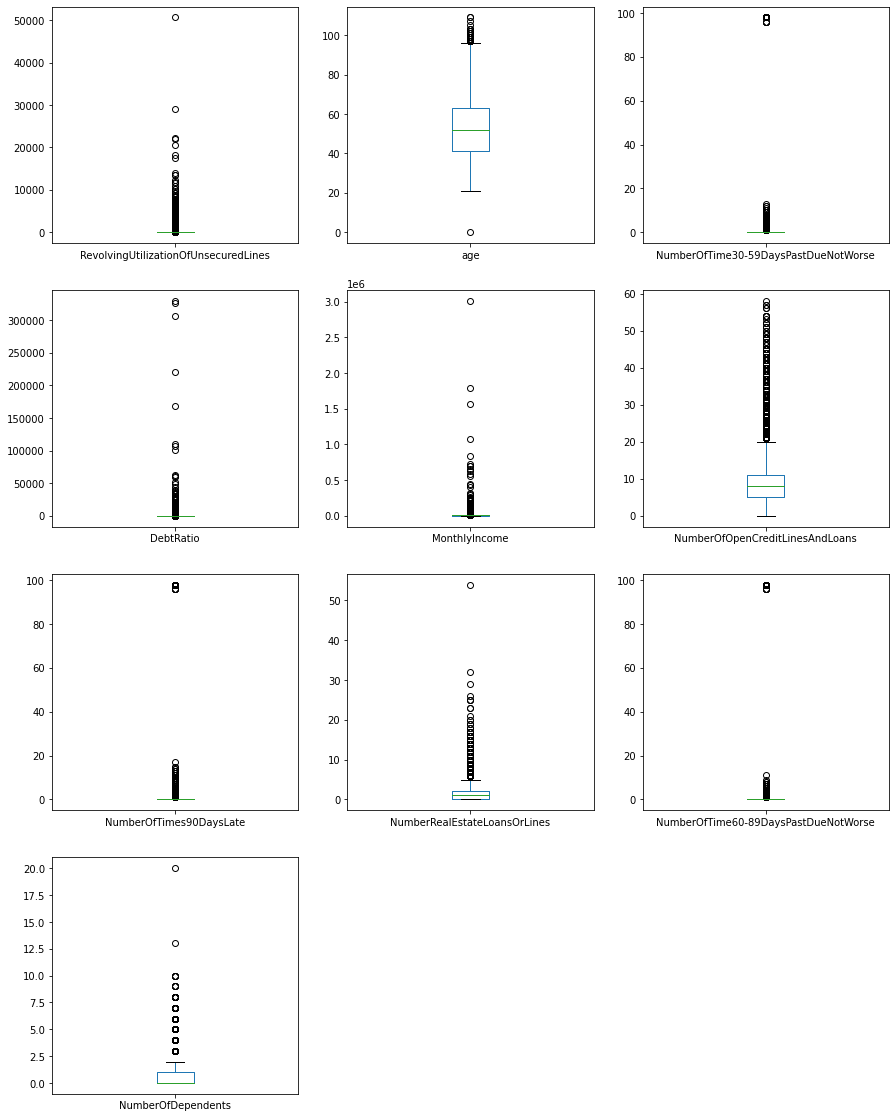

In [8]:
data.iloc[:,1:].plot(kind= 'box' , subplots=True, layout=(4,3), sharex=False, sharey=False,figsize=(15,20))
plt.show()

some outlier has to be dropped

####Replace Null data with median

Preprocessed nullity in MonthlyIncome and NumberOfDependents.

In [9]:
data["MonthlyIncome"].fillna(data["MonthlyIncome"].median(), inplace=True)

In [10]:
data["NumberOfDependents"].fillna(data["NumberOfDependents"].median(), inplace=True)

####Drop outlier

Drop outlier which is over than 99.99% in RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome,NumberRealEstateLoansOrLines,
NumberOfDependents and age "0" data

In [11]:
#drop age
data_ml = data.copy()
data_ml = data_ml.query("age!=0")

#drop 99.99 percentile
RUUL_99 = data_ml["RevolvingUtilizationOfUnsecuredLines"].quantile(0.9999)
D_ratio_99 = data_ml["DebtRatio"].quantile(0.9999)
M_income_99 = data_ml["MonthlyIncome"].quantile(0.9999)
E_loan_99 = data_ml["NumberRealEstateLoansOrLines"].quantile(0.9999)
Dependents_99 = data_ml["NumberOfDependents"].quantile(0.9999)

data_ml = data_ml[data_ml["RevolvingUtilizationOfUnsecuredLines"]<RUUL_99]
data_ml = data_ml[data_ml["DebtRatio"]<D_ratio_99]
data_ml = data_ml[data_ml["MonthlyIncome"]<M_income_99]
data_ml = data_ml[data_ml["NumberRealEstateLoansOrLines"]<E_loan_99]
data_ml = data_ml[data_ml["NumberOfDependents"]<Dependents_99]

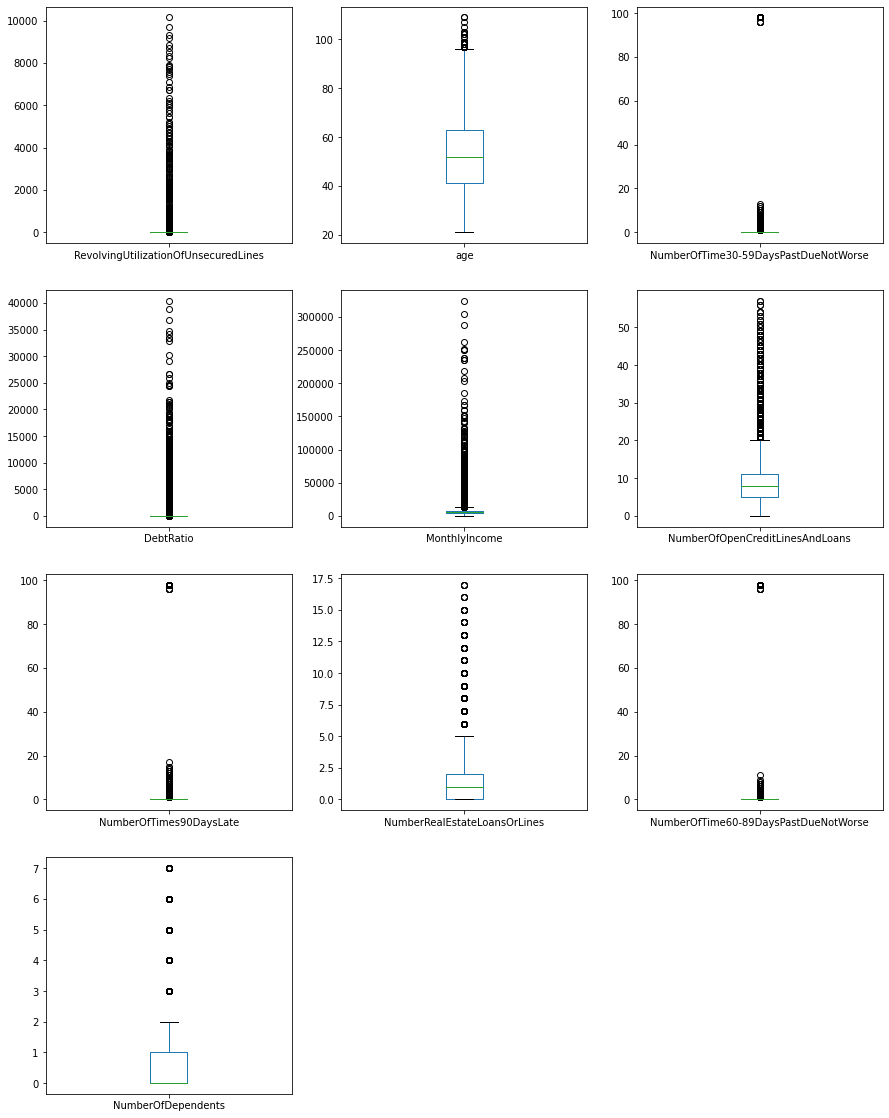

In [12]:
data_ml.iloc[:,1:].plot(kind= 'box' , subplots=True, layout=(4,3), sharex=False, sharey=False,figsize=(15,20))
plt.show()

In [13]:
X = data_ml.iloc[:,2:]
y = data_ml["SeriousDlqin2yrs"]
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0, stratify=y)

## Train Data

###Gradient Boosting with Grid Search

In [14]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_depth' : [5,6,7],
}

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier( random_state=4321)

In [16]:
from sklearn.model_selection import GridSearchCV
CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv= 5)

In [17]:
CV_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [18]:
CV_gbc.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [19]:
gbc =CV_gbc.best_estimator_
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4321, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [20]:
filename = 'gbc.sav'
pickle.dump(gbc, open(filename, 'wb'))

In [21]:
gbc_pred = gbc.predict(x_test)

In [39]:
print(confusion_matrix(y_test,gbc_pred))

[[41510   455]
 [ 2433   573]]


In [42]:
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     41965
           1       0.56      0.19      0.28      3006

    accuracy                           0.94     44971
   macro avg       0.75      0.59      0.63     44971
weighted avg       0.92      0.94      0.92     44971



### MLPClassifier

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
X_train_MLP = scaler.transform(X_train)
x_test_MLP = scaler.transform(x_test)

In [26]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

In [27]:
mlp.fit(X_train_MLP, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=22, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=12345, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.2, verbose=False,
              warm_start=False)

In [28]:
filename = 'mlp.sav'
pickle.dump(mlp, open(filename, 'wb'))

In [29]:
predictions = mlp.predict(x_test_MLP)

In [30]:
print(confusion_matrix(y_test,predictions))

[[41539   426]
 [ 2448   558]]


In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     41965
           1       0.57      0.19      0.28      3006

    accuracy                           0.94     44971
   macro avg       0.76      0.59      0.62     44971
weighted avg       0.92      0.94      0.92     44971



###k-NN with Grid Search

In [32]:
from sklearn.neighbors import KNeighborsClassifier
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=dict(
        n_neighbors=[1,2,3,4,5,6,7,8,9,10],
        weights=['uniform', 'distance'],
    ),
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1 # Parallel
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [33]:
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [34]:
model = grid_search.best_estimator_

In [35]:
y_pred = model.predict(x_test)

In [36]:
print(confusion_matrix(y_test,y_pred))

[[41847   118]
 [ 2948    58]]


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     41965
           1       0.33      0.02      0.04      3006

    accuracy                           0.93     44971
   macro avg       0.63      0.51      0.50     44971
weighted avg       0.89      0.93      0.90     44971

